In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 5 integer,2 float and 5 categorical variables in training dataset. Our binary response variable is "Survived".  
Age and Cabin variables has null values.

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


38% of the passangers in training set survived. Passanger ages reange between 0.42 and 80 years old with mean of 29.69.  

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

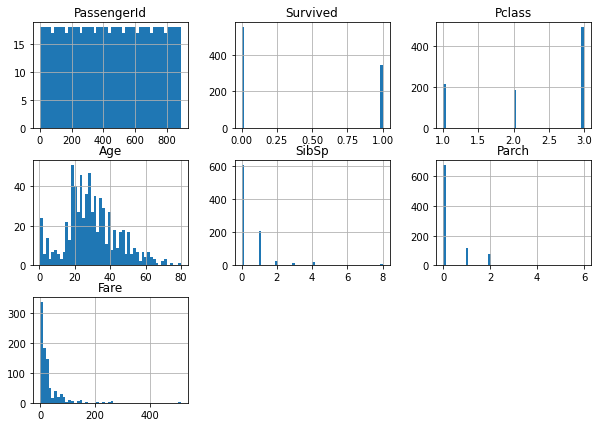

In [6]:
train_data.hist(bins=50, figsize=(10,7))

# Filling NA values 

In [7]:
total_train = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_2], axis=1, keys=['Total', '%'])
missing_data_train.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


**CABIN AND FARE**

In [8]:
total_test = test_data.isnull().sum().sort_values(ascending=False)
percent_1 = test_data.isnull().sum()/test_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_2], axis=1, keys=['Total', '%'])
missing_data_test.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0


* 687 values in Cabin variable is missing which equals to 77.1% of the training dataset. Whereas, 177 values in Age variable is missing with 19.9% of training dataset. Lastly, 2 embarked values are missing.
* We also have lots of missing values in Cabin variable, 86 values in Age variable and 1 value in Fare variable in test dataset.


In [9]:
print('\nDuplicated values in train {}'.format(train_data.duplicated().sum()))
print('Duplicated values in test {}'.format(test_data.duplicated().sum()))


Duplicated values in train 0
Duplicated values in test 0


In [10]:
train_data["Embarked"].value_counts()
train_data["Embarked"].fillna("S",inplace=True)
train_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
test_data['Fare'].fillna(value=test_data.Fare.mean(), inplace=True)

* 2 missing values in Embarked variable filled with most frequent group "S" (train)
* 1 missing value in Fare variable filled with average** (test)

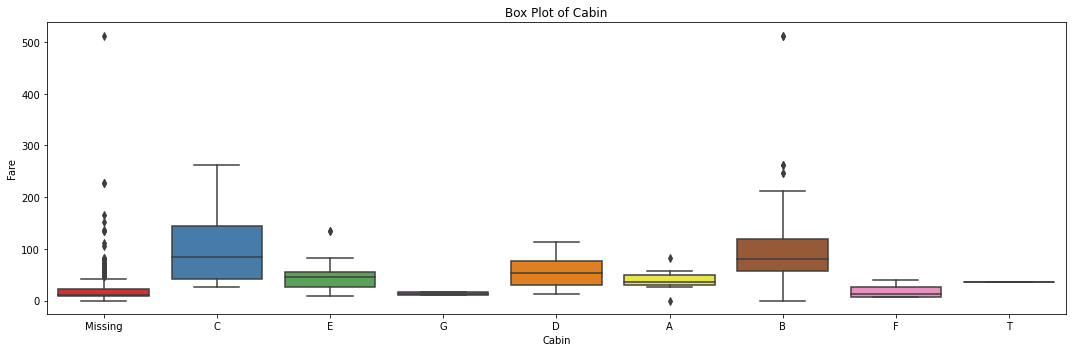

In [12]:
train_data['Cabin'] = pd.Series(['Missing' if pd.isnull(pp) else pp[0] for pp in train_data['Cabin']])
test_data['Cabin'] = pd.Series(['Missing' if pd.isnull(pp) else pp[0] for pp in test_data['Cabin']])

plt.figure(figsize=(15,5))
plt.title('Box Plot of Cabin')
sns.boxplot(x='Cabin',y='Fare',data=train_data, palette='Set1')
plt.tight_layout()

It can be said that people whose cabin information is missing do not have a cabin. Because their fare scores are low too. However, there is still large amount of outlier values in missing group which has to be handled.

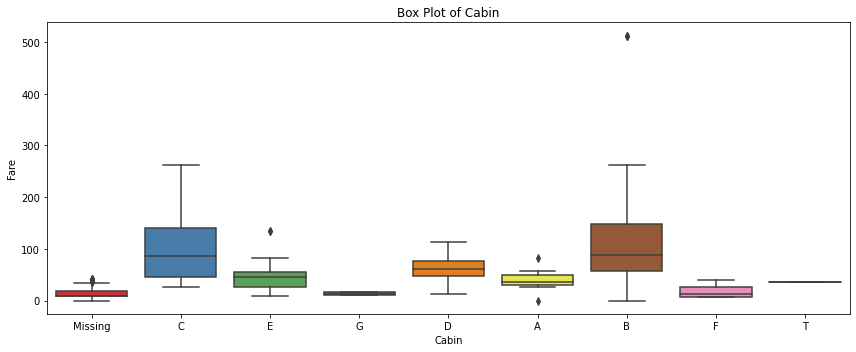

In [13]:
def missing_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='Missing':
        if (fare >= 110):
            return 'B'
        if ((fare < 110) and (fare > 100)):
            return 'C'
        if ((fare < 100) and (fare > 55)):
            return 'D'
        if ((fare < 55) and (fare > 46)):
            return 'D'
        else:
            return 'Missing'
    else:
        return cabin
      
train_data['Cabin'] = train_data[['Cabin', 'Fare']].apply(missing_cabin, axis=1)
test_data['Cabin'] = test_data[['Cabin', 'Fare']].apply(missing_cabin, axis=1)

plt.figure(figsize=(12,5))
plt.title('Box Plot of Cabin')
sns.boxplot(x='Cabin',y='Fare',data=train_data, palette='Set1')
plt.tight_layout()

**Filling Age values with Name**

In [14]:
title=train_data['Name'].str.extract('.+?,\s(.+?).\s')[0]
title.value_counts().head()

Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Name: 0, dtype: int64

* In the dataset, names are filled in specific order, such as Alp, Mr. Yalcin
* We can extract their titles to create some group

In [15]:
mean_age_miss = round(train_data[train_data["Name"].str.contains('Miss.', na=False)]['Age'].mean(),0)
mean_age_mrs = round(train_data[train_data["Name"].str.contains('Mrs.', na=False)]['Age'].mean(),0)
mean_age_mr = round(train_data[train_data["Name"].str.contains('Mr.', na=False)]['Age'].mean(),0)
mean_age_master = round(train_data[train_data["Name"].str.contains('Master.', na=False)]['Age'].mean(),0)
mean_age_dr = round(train_data[train_data["Name"].str.contains('Dr.', na=False)]['Age'].mean(),0)
mean_age_ms = round(train_data[train_data["Name"].str.contains("Ms.", na =False)]["Age"].mean(),0)
print('Mean age of Miss. title {}'.format(mean_age_miss))
print('Mean age of Mrs. title {}'.format(mean_age_mrs))
print('Mean age of Mr. title {}'.format(mean_age_mr))
print('Mean age of Master. title {}'.format(mean_age_master))
print('Mean age of Dr. title {}'.format(mean_age_dr))
print("Mean age of Ms. title {}".format(mean_age_ms))

Mean age of Miss. title 22.0
Mean age of Mrs. title 36.0
Mean age of Mr. title 33.0
Mean age of Master. title 5.0
Mean age of Dr. title 39.0
Mean age of Ms. title 28.0


In [16]:
def fill_age(name_age):
    name = name_age[0]
    age = name_age[1]
    if pd.isnull(age):
        if "Mr." in name:
            return mean_age_mr
        if "Miss" in name:
            return mean_age_miss
        if "Mrs." in name:
            return mean_age_mrs
        if "Master" in name:
            return mean_age_master
        if "Dr." in name:
            return mean_age_dr
        if "Ms." in name:
            return mean_age_ms
    else:
        return age

train_data['Age'] = train_data[['Name', 'Age']].apply(fill_age,axis=1)
test_data['Age'] = test_data[['Name', 'Age']].apply(fill_age,axis=1)
print(train_data['Age'].isnull().sum())

0


We had 177 null values in Age variable in train dataset before. Some people have title in their names such as Dr., Mr. Miss, Mrs. or Master.

* Make 4 group with people who has these titles on their names
* Take the average of their ages
* Fill NA age values with these averages for people who has title but unknown age data Now all null values in Age variable is filled.

In [17]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

We filled all of the missing values.


In [19]:
train_data.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

The passangers belong to port C has the strongest possibility to survive in general with 55%. But when we separate into genders, we have interesting correlation between gender and survivals. 

**Data Engineering**

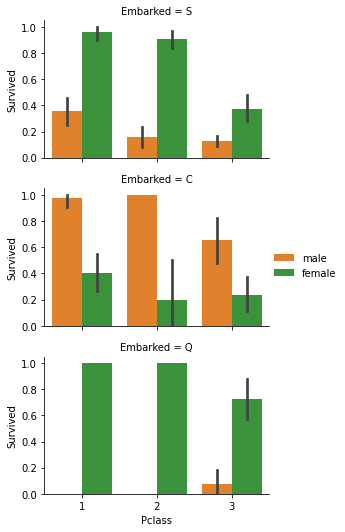

In [20]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', height=2.5, aspect=1.6)
FacetGrid.map(sns.barplot, 'Pclass', 'Survived', 'Sex', palette = ["C1","C2"],hue_order = None,order=None)
FacetGrid.add_legend()

Female passangers belong to Embarked S and Q, have more chance to survive whereas male passanger has quite low chance to live (especially in port Q its almost 0). However, for port C,vice versa, male passengers survive with higher possilibility then females. 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

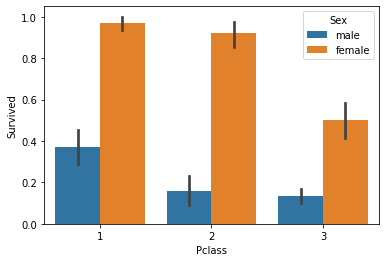

In [21]:
sns.barplot(x='Pclass', y='Survived', data=train_data, hue ="Sex")

When we look at the Pclass variable in genders, we can there is strong correlationg between class and surviving possibility as expected. Especially, female people have significantly strong probability to survive in class 1 and 2.

In [22]:
full_data = [train_data, test_data]
for dataset in full_data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 1
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 0
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

0    537
1    354
Name: not_alone, dtype: int64

In [23]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

We can see that, 537 passengers in training set does not have any relatives in the ship with them, whereas 354 people are not alone in the ship. Also more than half of passengers are from class 3

<AxesSubplot:xlabel='relatives', ylabel='Survived'>

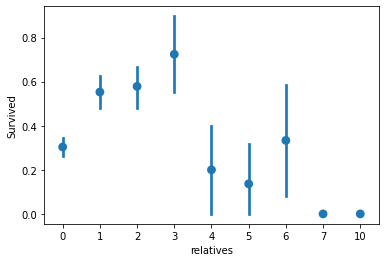

In [24]:
sns.pointplot(x="relatives",y="Survived",data = train_data,join=False)

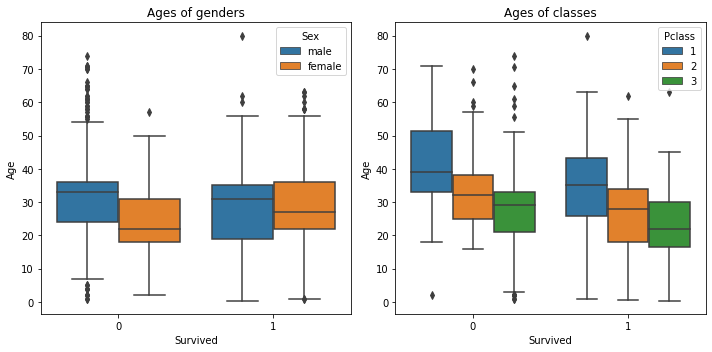

In [25]:
fig,(ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax0.set_title('Ages of genders')
sns.boxplot(x='Survived', y='Age', hue='Sex', data=train_data, ax=ax0)
ax1.set_title('Ages of classes')
sns.boxplot(x='Survived', y='Age', hue='Pclass', data=train_data, ax=ax1)
plt.tight_layout()

Also, when we extract the ages of survivors, we can obtain more information from dataset
* Passenger classes directly correlated with age. Older passangers are more belong to 1st class, whereas young people are members of 3rd class.
* Survivals are slightly younger than the people who could not survived.

<AxesSubplot:>

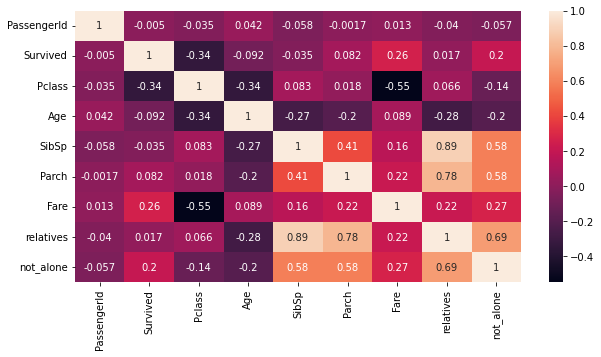

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr(), annot=True)

When we consider the integer variables, we might say that only "Fare" variable have correlation with "Survived" variable which is weak alone at first blush.

**Converting Categorical Variables**

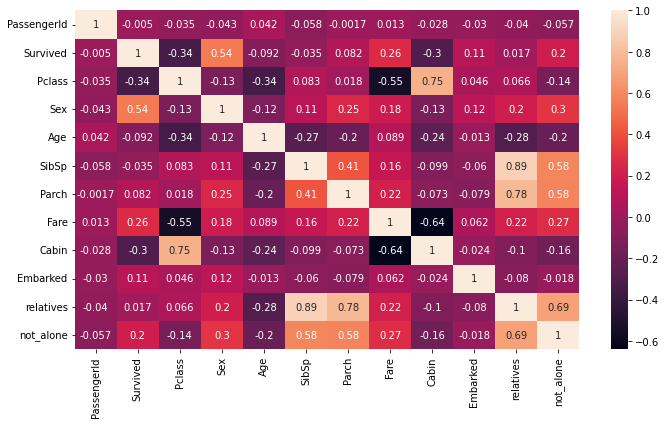

In [27]:
categories = {"female": 1, "male": 0}
train_data['Sex']= train_data['Sex'].map(categories)
test_data['Sex']= test_data['Sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked']= train_data['Embarked'].map(categories)
test_data['Embarked']= test_data['Embarked'].map(categories)

categories = train_data.Cabin.unique()
train_data['Cabin'] = train_data.Cabin.astype("category").cat.codes
test_data['Cabin'] = test_data.Cabin.astype("category").cat.codes

plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(), annot=True)
plt.tight_layout()

In [28]:
corr_matrix = train_data.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Fare           0.257307
not_alone      0.203367
Embarked       0.106811
Parch          0.081629
relatives      0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.091876
Cabin         -0.295220
Pclass        -0.338481
Name: Survived, dtype: float64

Features which are less related with dependent variable can be dropped now.

In [29]:
#train_data = train_data.drop(['Name','Ticket','PassengerId'], axis=1)
#test_data = test_data.drop(['Name','Ticket','PassengerId'], axis=1)
#train_data.head()
train_data = train_data.drop(['Name','Ticket'], axis=1)
test_data = test_data.drop(['Name','Ticket'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,0,22.0,1,0,7.2500,7,1,1,1
1,2,1,1,1,38.0,1,0,71.2833,2,2,1,1
2,3,1,3,1,26.0,0,0,7.9250,7,1,0,0
3,4,1,1,1,35.0,1,0,53.1000,2,1,1,1
4,5,0,3,0,35.0,0,0,8.0500,7,1,0,0


We can scale our training data with sklearn MinMaxScaler library

**Normalization**

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Dropping label
LABEL = 'Survived'
y = train_data[LABEL]
train_data = train_data.drop(LABEL, axis=1)  # Dropping label to normalize

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

scaled_train = pd.DataFrame(scaled_train, columns=train_data.columns, index=train_data.index)
scaled_test = pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)

scaled_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone
0,0.000000,1.0,0.0,0.271174,0.125,0.0,0.014151,0.875,0.0,0.1,1.0
1,0.001124,0.0,1.0,0.472229,0.125,0.0,0.139136,0.250,0.5,0.1,1.0
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,0.875,0.0,0.0,0.0
3,0.003371,0.0,1.0,0.434531,0.125,0.0,0.103644,0.250,0.0,0.1,1.0
4,0.004494,1.0,0.0,0.434531,0.000,0.0,0.015713,0.875,0.0,0.0,0.0


**Random Forest with Grid Search CV implementation on Titanic dataset**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2,stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(712, 11) (179, 11)
(712,) (179,)


In [32]:
rf = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [33]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
# Define a grid of hyperparameter 'params_rf'
params_rf = { "criterion" : ["gini", "entropy"], 
             "min_samples_leaf" : [1, 5, 10], 
             "min_samples_split" : [2, 4, 10, 12, 16], 
             "n_estimators": [50, 100, 400, 700, 1000]}
# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring = "accuracy",
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [34]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10, 12, 16],
                         'n_estimators': [50, 100, 400, 700, 1000]},
             scoring='accuracy', verbose=1)

In [35]:
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [36]:
best_model = grid_rf.best_estimator_
print(best_model)


RandomForestClassifier(criterion='entropy', min_samples_split=10, n_jobs=-1,
                       random_state=1)


In [37]:
y_pred = best_model.predict(X_test)

In [38]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.7932960893854749


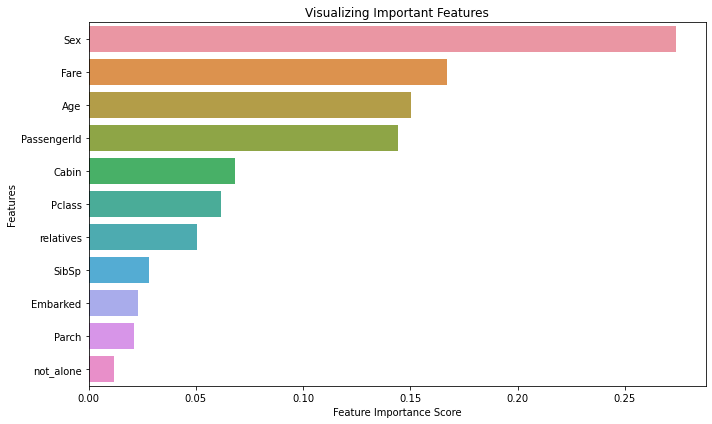

In [39]:
feature_imp = pd.Series(best_model.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [40]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone
0,892,3,0,34.5,0,0,7.8292,7,3,0,0
1,893,3,1,47.0,1,0,7.0000,7,1,1,1
2,894,2,0,62.0,0,0,9.6875,7,3,0,0
3,895,3,0,27.0,0,0,8.6625,7,1,0,0
4,896,3,1,22.0,1,1,12.2875,7,1,2,1


With feature importance of random forest model, it can be seen which features are relevant and which ones are not relevant at all. For further processes, we can delete features with low scores based on the model. 

In [41]:
X = scaled_train
X_test = scaled_test

best_model.fit(X, y)
predictions = best_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
